<a href="https://colab.research.google.com/github/Edgar-IAH/IA-Grupo-45/blob/main/Semana_8/SVM_Equipo45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Eduardo Aldair Ahumada García Jurado - A01422929
* Edgar Rodolfo Escobar Gomez - A01793900
* Walter André Hauri Rosales - A01794237
* Héctor Salvador Montañez Alvarez - A01332665
* Jaime Andres Palacios Campaña - A01794023

## *Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. Se trabajará con el conjunto de datos conocido como "Australian credit approval", un problema de clasificación que ya has estudiado en semanas previas y cuyos datos puedes encontrar en la siguiente liga del repositorio de la UCI:*##
##*https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29*
## *El objetivo es determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante. En la página de la UCI encuentras mayor información sobre el problema.*

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.


# **Ejercicio-1.** 
## *Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.*

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC

%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/cb8335f587eb54109eae098c8ce8dd7bd9e0bec6/Semana_8/australian.csv"
datos = pd.read_csv(url)
datos.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
X = datos.iloc[:, :-1] 
Y = datos.iloc[:, -1] 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.15, random_state=0)


In [ ]:
print(X.shape)
print(Y.shape)


(690, 14)
(690,)


# **Ejercicio-2.**
## *Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información.*

In [ ]:
# imputacion por moda - Categóricos
datos_cat = ["A1","A4","A5","A7","A8","A9","A11","A12"]

# imputacion por moda - Continuos
datos_cnt = ["A2","A3","A7","A10","A13","A14"]

# imputacion por moda - Binarios
datos_bin = ["A15"]


- Se comprueba que no hay valores nulos en el dataset

In [ ]:
datos.isna().sum()


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [ ]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [ ]:
for v in datos.columns: #datos.columns:
    print(v)
    print(datos[v].unique())
    print("-----")


A1
[1 0]
-----
A2
[22.08 22.67 29.58 21.67 20.17 15.83 17.42 58.67 27.83 55.75 33.5  41.42
 20.67 34.92 58.58 48.08 18.92 20.   22.42 28.17 19.17 41.17 41.58 19.5
 32.75 22.5  33.17 30.67 23.08 27.   20.42 52.33 42.83 74.83 25.   39.58
 47.75 47.42 23.17 22.58 26.75 63.33 23.75 20.75 24.5  16.17 29.5  52.83
 32.33 21.08 19.   27.58 40.   37.33 42.5  56.75 43.17 18.5  40.83 42.
 21.5  31.25 27.25 48.75 30.42 29.42 28.25 40.25 36.5  25.58 29.83 32.17
 25.17 35.17 18.58 39.92 23.42 37.58 24.75 47.   34.17 22.17 27.75 42.75
 28.67 36.25 18.17 21.25 38.92 31.83 17.33 39.08 38.67 27.67 22.25 49.83
 38.25 47.33 35.75 33.58 34.08 22.75 40.58 38.75 57.08 22.   58.33 28.92
 46.   21.   20.83 24.58 26.5  40.92 38.33 19.58 39.25 25.75 46.08 19.67
 18.83 64.08 16.5  68.67 76.75 15.92 34.83 45.17 15.17 52.5  18.   37.5
 47.83 33.08 43.08 34.5  18.25 17.92 18.42 62.5  23.5  35.25 56.83 53.33
 42.17 33.75 25.67 24.33 23.33 37.17 26.25 29.75 23.   17.25 29.25 28.58
 34.58 18.75 17.08 16.08 32.92 20.33 

In [ ]:
datos.describe()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


- Analizamos las distribuciones de las variables

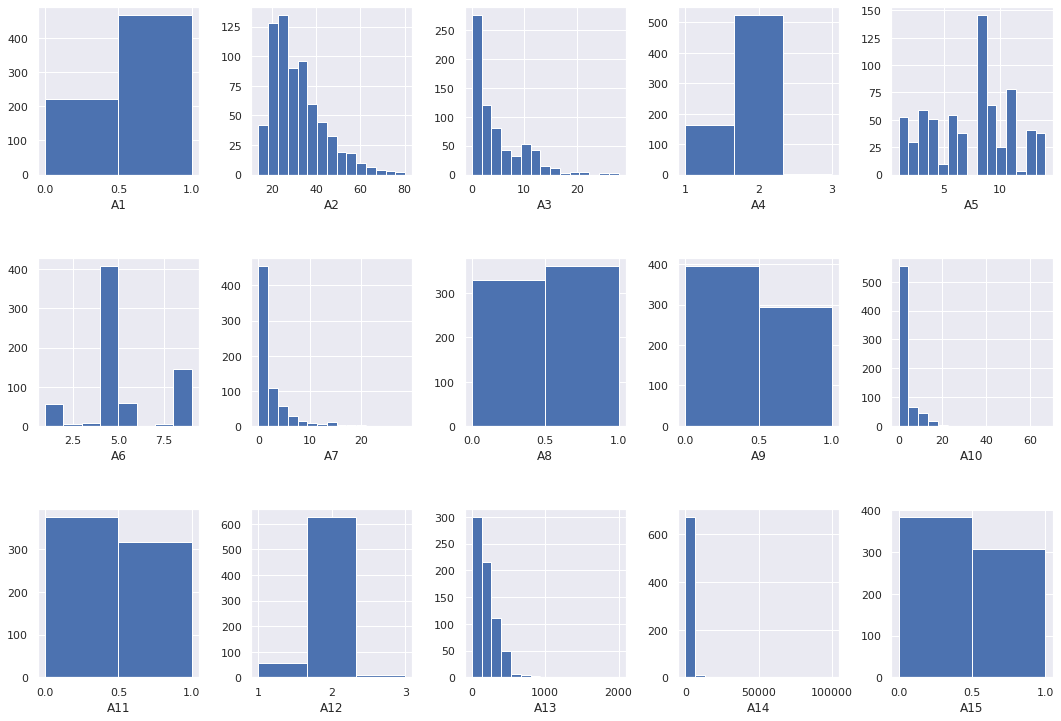

In [ ]:
# Tamaño de la gráfica
sns.set(rc={"figure.figsize": (15, 10)})
fig, axes = plt.subplots(3, 5)

# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)

# Grafica los histogramas uno por uno
for k in range(0, 15):
    plt.subplot(3, 5, k + 1)
    # Número de valores diferentes.
    buckets = datos.iloc[:, k].nunique()
    
    if buckets > 10:
        buckets = 15
        
    # Crea el histograma
    datos.iloc[:, k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(datos.columns[k])
# Despliega la figura con las 10 gráficas
plt.show()


- Probamos transformaciones a las variables numéricas

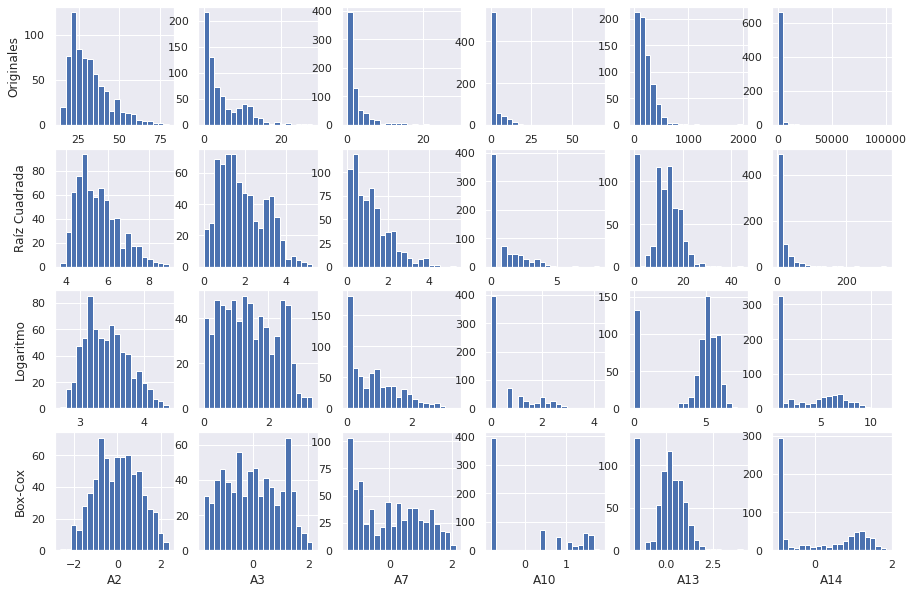

In [ ]:
# Mediante histogramas revisamos la distribución de frecuencias para encontrar 
# cual daría la mejor simetria pos-transformación de las variable numéricas

sns.set(rc={"figure.figsize": (15, 10)})
fig, axes = plt.subplots(4, 6)

datos_num_transf = datos_cnt

for k in range(0, 6):
    # Datos originales ---------------------------------------------------------
    plt.subplot(4, 6, k + 1)
    Transf0 = (
        datos[datos_num_transf[k]].values.reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf0, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Originales")

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(4, 6, k + 7)
    Transf1 = np.sqrt(
        Transf0
    )  # Se debe aplica la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf1, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Raíz Cuadrada")

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(4, 6, k + 13)
    Transf2 = np.log1p(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf2, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Logaritmo")

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(4, 6, k + 19)
    
    Transf4 = power_transform(
        (datos[datos_num_transf[k]].values.reshape(-1, 1)) + 1, method="box-cox"
    )  #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf4, bins=20
    )  #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    
    if k == 0:
        plt.ylabel("Box-Cox")

- Observamos un boxplot de las variables numéricas

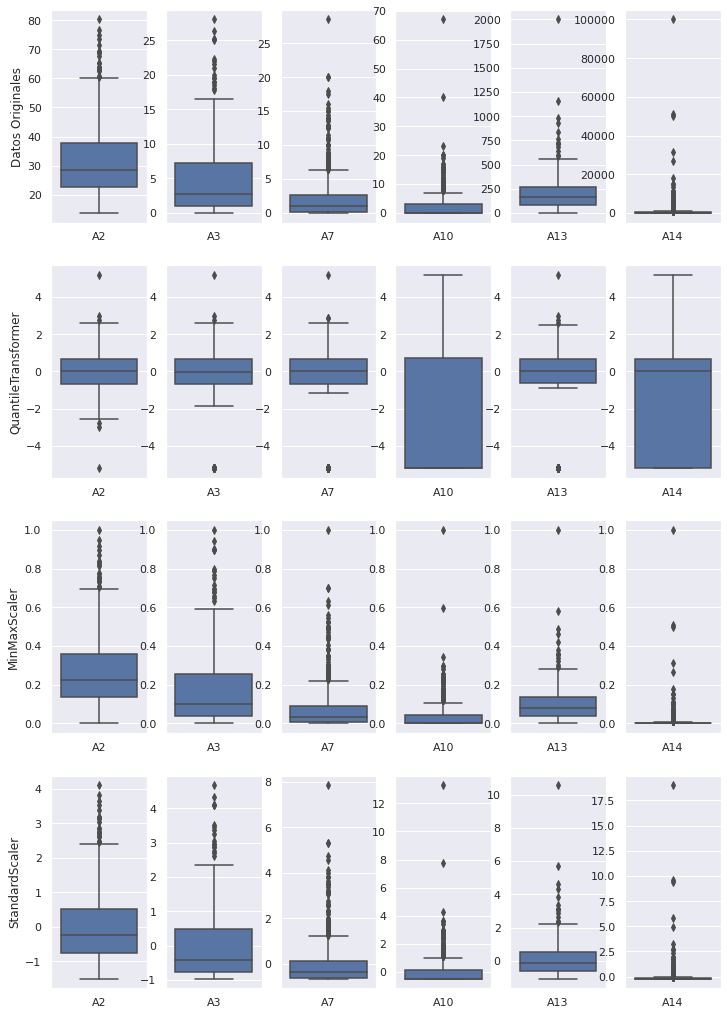

In [ ]:
sns.set(rc={"figure.figsize": (12, 18)})
fig, axes = plt.subplots(4, 6)

datos_copy = datos.copy()

scaler1 = QuantileTransformer(output_distribution="normal", n_quantiles=datos_copy.shape[0])
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()

for k in range(0, 6):
    plt.subplot(4, 6, k + 1)
    col = datos_num_transf[k]
    Transf1 = datos_copy[col].values.reshape(-1, 1)
    sns.boxplot(data=Transf1).set_xticklabels([col])
    if k == 0:
      plt.ylabel("Datos Originales")

    plt.subplot(4, 6, k + 7)
    Transf2 = scaler1.fit_transform(datos_copy[col].values.reshape(-1, 1))
    sns.boxplot(data=Transf2).set_xticklabels([col])
    if k == 0:
       plt.ylabel(scaler1.__class__.__name__)

    plt.subplot(4, 6, k + 13)
    Transf3 = scaler2.fit_transform(datos_copy[col].values.reshape(-1, 1))
    sns.boxplot(data=Transf3).set_xticklabels([col])
    if k == 0:
      plt.ylabel(scaler2.__class__.__name__)

    plt.subplot(4, 6, k + 19)
    Transf4 = scaler3.fit_transform(datos_copy[col].values.reshape(-1, 1))
    sns.boxplot(data=Transf4).set_xticklabels([col])
    if k == 0:
      plt.ylabel(scaler3.__class__.__name__)

# Despliega la figura con las 10 gráficas
plt.show()

- A partir de estas transformaciones decidimos utilizar la tranformación logarítmica en nuestro pipeline para las variables numéricas

In [ ]:
# En esta sección de código definimos las transformaciones
# ========================================================
# Transformaciones a factores categóricos

cat_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
        ("OneHotE", OneHotEncoder(handle_unknown="ignore")),
    ]
)
cat_pipeline_nombres = datos_cat

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(
    steps=[
        ("impMediana", SimpleImputer(strategy="median")),
        # ("log", FunctionTransformer(np.log1p)),
        ("quantile", QuantileTransformer(output_distribution="normal")),
        ("escalaMinMax", MinMaxScaler()),
    ]
)
num_pipeline_nombres = datos_cnt

# Conjuntamos las transformaciones que se aplicarán a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("catpipe", cat_pipeline, cat_pipeline_nombres),
        ("numpipe", num_pipeline, num_pipeline_nombres),
    ],
    remainder="passthrough",
)



# **Ejercicio-3.**
## *Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?*

In [ ]:
# Funciones para generar scores
def accuracy(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    
    tot = cm.sum()

    vp = cm[1, 1]
    vn = cm[0, 0]

    score = (vp + vn) / tot

    return score


def precision(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    vp = cm[1, 1]

    if (vp + fp) == 0:
        score = 0
    else:
        score = vp / (vp + fp)

    return score


def recall(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fn = cm[1, 0]
    vp = cm[1, 1]

    if (vp + fn) == 0:
        score = 0
    else:
        score = vp / (vp + fn)

    return score


def f1(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]

    if 2 * vp + fp + fn == 0:
        score = 0
    else:
        score = 2 * vp / (2 * vp + fp + fn)

    return score


def gmean(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    vn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]
    
    if (vp + fn) == 0 or (vn + fp) == 0:
        score = 0
    else:
        recall = vp / (vp + fn)
        specifity = vn / (vn + fp)
        score = np.sqrt(recall * specifity)

    return score

In [ ]:
#### ¿Ocupamos las variables después de normalizarlas con el pipeline (column transformer)?

X_val_dummy, X_train_dummy, Y_val_dummy, Y_train_dummy = train_test_split(X_train, Y_train, train_size=0.25, stratify=Y_train, random_state=0) # realizamos la partición.

modeloDummy = DummyClassifier() # estrategia default es mean, siempre se predice la media de los datos de entrenamiento

modeloDummy.fit(X_train_dummy, Y_train_dummy)       # entrenamos con los conjuntos de entrenamiento

yhat_train_dummy = modeloDummy.predict(X_train_dummy)
yhat_val_dummy = modeloDummy.predict(X_val_dummy)

print('===============================\nDUMMY Classifier:\n===============================')
print('ENTRENAMIENTO:')
print("Confusion matrix:\n", confusion_matrix(Y_train_dummy, yhat_train_dummy))
print('Accuracy: ', accuracy(Y_train_dummy, yhat_train_dummy))
print('F1-score: ', f1(Y_train_dummy, yhat_train_dummy))
print('Precision: ', precision(Y_train_dummy, yhat_train_dummy))
print('Recall: ', recall(Y_train_dummy, yhat_train_dummy))

print('\nVALIDACION:')
print("Confusion matrix:\n", confusion_matrix(Y_val_dummy, yhat_val_dummy))
print('Accuracy: ', accuracy(Y_val_dummy, yhat_val_dummy))
print('F1-score: ', f1(Y_val_dummy, yhat_val_dummy))
print('Precision: ', precision(Y_val_dummy, yhat_val_dummy))
print('Recall: ', recall(Y_val_dummy, yhat_val_dummy))

DUMMY Classifier:
ENTRENAMIENTO:
Confusion matrix:
 [[244   0]
 [196   0]]
Accuracy:  0.5545454545454546
F1-score:  0.0
Precision:  0
Recall:  0.0

VALIDACION:
Confusion matrix:
 [[81  0]
 [65  0]]
Accuracy:  0.5547945205479452
F1-score:  0.0
Precision:  0
Recall:  0.0


# **Ejercicio-4.**
## *Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.* 

In [ ]:
mi_modelo_svm = SVC(random_state=45, probability=True)  # Creamos el modelo
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=45)  # k-folds cross-validation
gamma = list(np.logspace(-2, 2, 3))
gamma.extend(["scale", "auto"])

dicc_grid = {
    "C": np.logspace(
        -2, 2, 3
    ),  # [10^-5, 10^-4, 10^-3, 10^-2, 0.1, 1, 10, 10^3, 10^4, 10^5]
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": gamma,
}

# dicc_grid = {'C': np.logspace(-2, 2, 5),
#              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#             }


# ================================================
scores = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "gmean": gmean,
}

all_results = {k: [] for k in scores.keys()} # save results on each metric for each model
best_models = {k: None for k in scores.keys()} # save the best models estimators

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

for k, v in scores.items():
    grid = GridSearchCV(
        estimator=mi_modelo_svm, param_grid=dicc_grid, scoring=make_scorer(v), cv=cv, n_jobs=-1
    )

    grid.fit(Xx, np.ravel(Y_train))

    print(f"----Mejor modelo para score {k}----")

    print(f"Mejor valor de score {k}:", grid.best_score_)
    print(
        "Mejor combinación de valores encontrados de los hiperparámetros:",
        grid.best_params_,
    )
    print("Métrica utilizada:", grid.scoring)

    mejor_modelo_svm = grid.best_estimator_ # Get the best estimator (SVM model)
    best_models[k] = mejor_modelo_svm # Save this best estimator in dictionary
    yhat_train = mejor_modelo_svm.predict(Xx) # Predict for the complete train set
    # Calculate each metric and save it
    for s, f in scores.items():
        all_results[s].append(f(Y_train, yhat_train))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (586). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


----Mejor modelo para score accuracy----
Mejor valor de score accuracy: 0.85157178038534
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Métrica utilizada: make_scorer(accuracy)
----Mejor modelo para score precision----
Mejor valor de score precision: 0.878005973218282
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
Métrica utilizada: make_scorer(precision)
----Mejor modelo para score recall----
Mejor valor de score recall: 0.9347936169550851
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
Métrica utilizada: make_scorer(recall)
----Mejor modelo para score f1----
Mejor valor de score f1: 0.8464888735464839
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Métrica utilizada: make_scorer(f1)
----Mejor modelo para score gmean----
Mejor valor de scor

# **Ejercicio-5.**
## *Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones.*

,accuracy,precision,recall,f1,gmean
accuracy,0.849829,0.774603,0.934866,0.847222,0.854771
precision,0.994881,1.000000,0.988506,0.994220,0.994236
recall,0.849829,0.774603,0.934866,0.847222,0.854771
f1,0.849829,0.774603,0.934866,0.847222,0.854771
gmean,0.849829,0.774603,0.934866,0.847222,0.854771


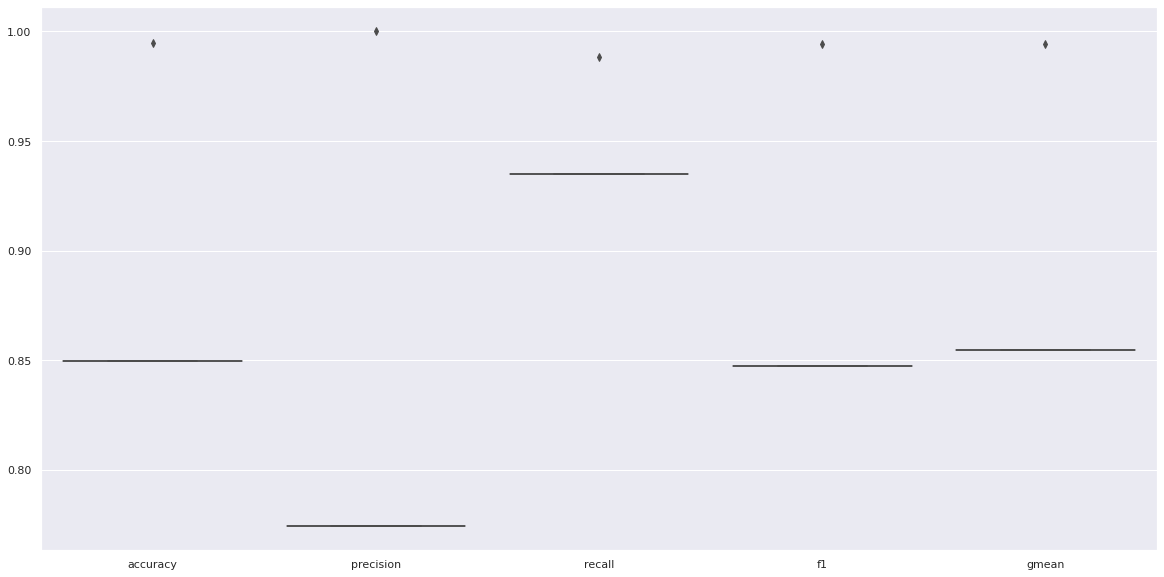

In [ ]:
results_df = pd.DataFrame(all_results, index=scores.keys())
sns.boxplot(data=results_df);
results_df

In [ ]:
mejor_modelo_svm = best_models["precision"] # Best model is selected

yhat_train = mejor_modelo_svm.predict(Xx)

print('===============================\nSVM Classifier:\n===============================')
print('ENTRENAMIENTO:')
print("Confusion matrix:\n", confusion_matrix(Y_train, yhat_train))
print('Accuracy: ', accuracy(Y_train, yhat_train))
print('F1-score: ', f1(Y_train, yhat_train))
print('Precision: ', precision(Y_train, yhat_train))
print('Recall: ', recall(Y_train, yhat_train))

SVM Classifier:
ENTRENAMIENTO:
Confusion matrix:
 [[325   0]
 [  3 258]]
Accuracy:  0.9948805460750854
F1-score:  0.9942196531791907
Precision:  1.0
Recall:  0.9885057471264368


# **Ejercicio-6.**
## *Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas.*

- Para este punto necesitamos primero definir la función para graficar la curva de aprendizaje. Esta la copiamos de la actividad pasada de árbol de decisión

In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, eje_y, titulo):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(titulo)
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(eje_y)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

-----------------------------------------
 MODELO: Máquina de vector soporte (SVM) 
-----------------------------------------


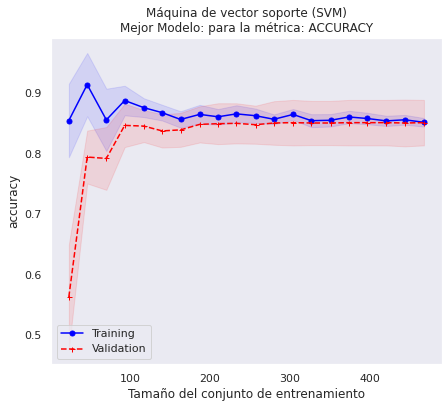

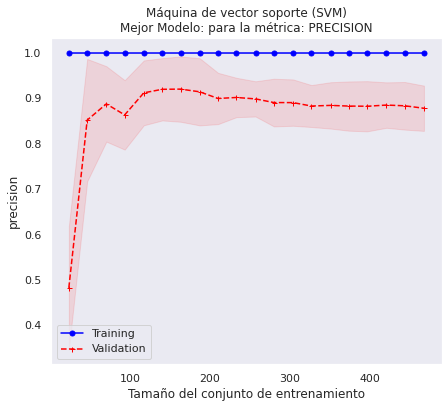

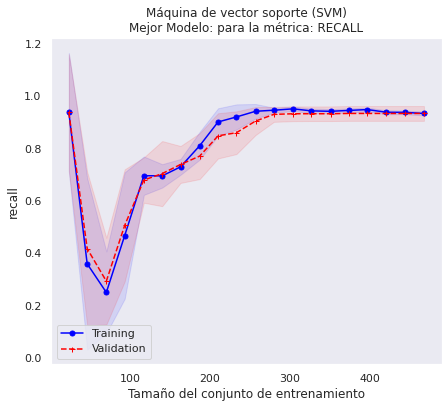

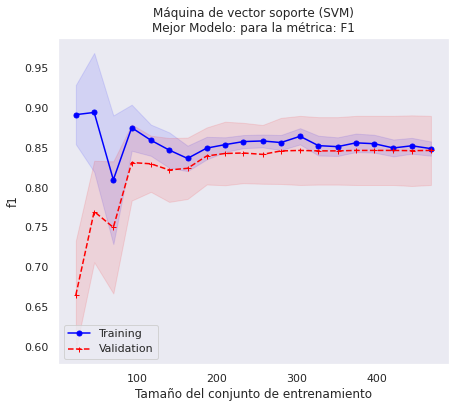

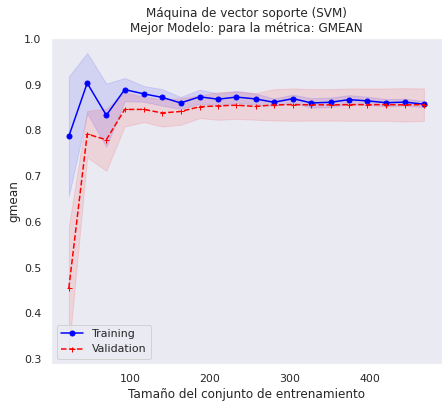

In [ ]:
delta_train_sz = np.linspace(.05, 1, 20)

metricas = {
        "accuracy": make_scorer(accuracy),
        "precision": make_scorer(precision),
        "recall": make_scorer(recall),
        "f1": make_scorer(f1),
        "gmean": make_scorer(gmean),
        }


for metrica_element, metrica_scorer in metricas.items():

    pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", best_models[metrica_element])])

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                    X = X_train,
                                                    y = Y_train,
                                                    scoring=metrica_scorer, #metricas["accuracy"],#make_scorer(f1),
                                                    cv = cv,
                                                    train_sizes = delta_train_sz,
                                                    random_state=45, n_jobs=-1)
    
    # Obtenemos el gráfico con las curvas de aprendizaje:
    print('---------------------------------------------------------\n')

    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, metrica_element, 
                         'Máquina de vector soporte (SVM)\nCurva de Aprendizaje\nMejor Modelo: para la métrica: '+metrica_element.upper())

# **Ejercicio-7.**
## *Con los mejores hiperparámetros encontrados encontrar la gráfica de la curva ROC y su área bajo la curva.*

In [ ]:
None

# **Ejercicio-8.**
## *Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score.*

In [ ]:
None

# **Ejercicio-9.**
## *Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean.*

Con el modelo, en lugar de predecir etiquetas de clase directamente, vamos a predecir probabilidades.

In [ ]:
# Predecimos probabilidades
Xx_test = columnasTransformer.fit_transform(X_test)

yhat = mejor_modelo_svm.predict_proba(Xx_test)

In [ ]:
# solo necesitamos las probabilidades para la clase positiva
probs = yhat[:, 1]

#definimos un conjunto de umbrales para evaluar las probabilidades. 
#probaremos todos los umbrales entre 0,0 y 1,0 con un tamaño de paso de 0,001.
thresholds = np.arange(0, 2, 0.001)

# aplicamos umbrales a las probabilidades positivas para crear etiquetas.
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# evaluamos cada umbral
scores = [gmean(yhat_train, to_labels(probs, t)) for t in thresholds]

# obtenemos el mejor umbral
ix = np.argmax(scores)
print('Threshold=%.3f, Gmean=%.5f' % (thresholds[ix], scores[ix]))

# **Ejercicio-10.**
## *Incluye tus conclusiones finales de la actividad.*

###**Fin de la Actividad de la semana 8.**